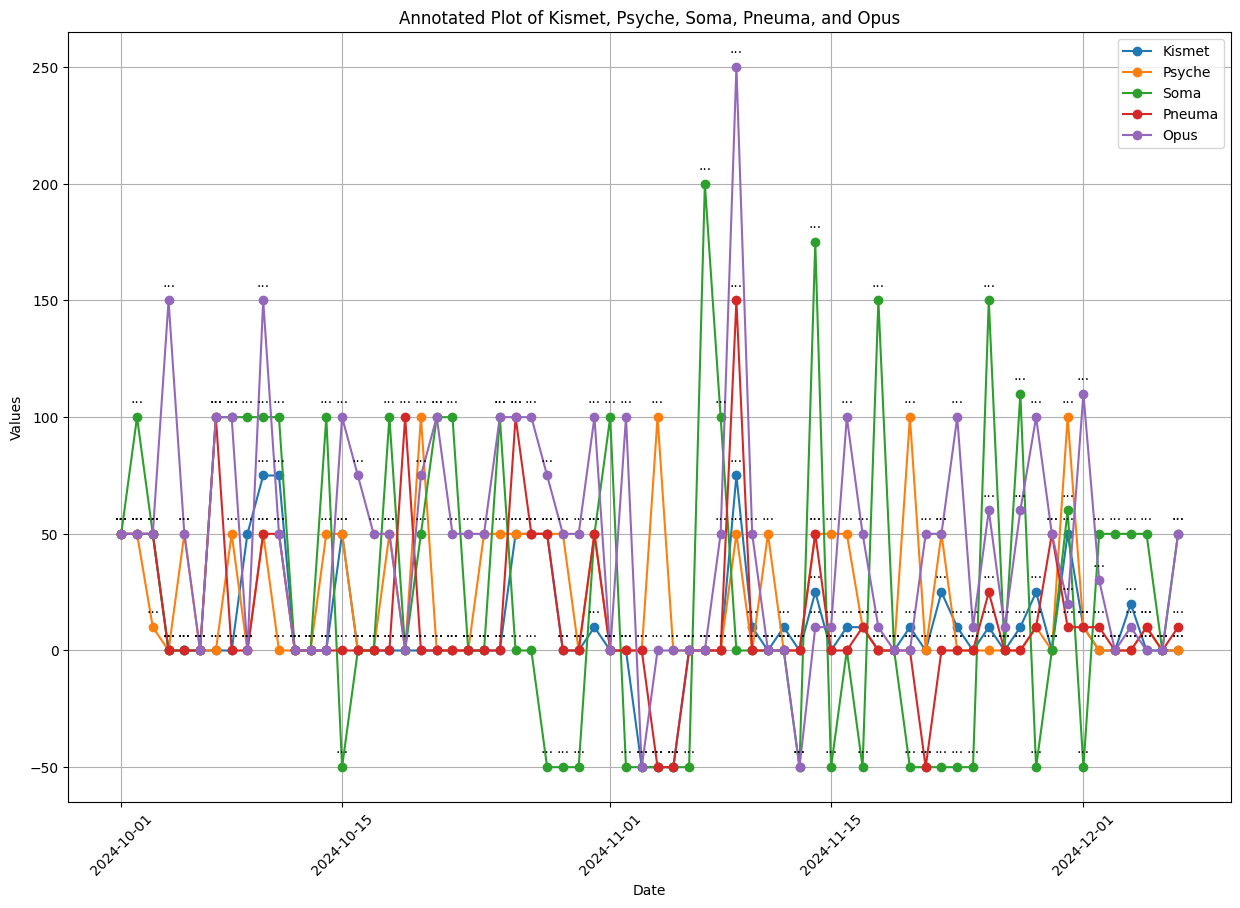

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

"""
Kismet = [50, 50, 50, 0, 0, 0, 0, 0, 50, 75, 75, 0, 0, 0, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 50, 0, 0, 10, 0, 0, -50, -50, -50, 0, 0, 0, 75, 10, 0, 10, 0, 25, 0, 10, 10, 0, 0, 10, 0, 25, 10, 0, 10, 0, 10, 25, 0, 50, 10, 0, 0, 10]

Psyche = [50, 50, 10, 0, 50, 0, 0, 50, 0, 50, 0, 0, 0, 50, 50, 0, 0, 50, 0, 100, 0, 0, 0, 50, 50, 50, 50, 50, 50, 0, 50, 0, 0, 0, 100, 0, 0, 0, 0, 50, 0, 50, 0, 0, 50, 50, 50, 10, 0, 0, 100, 0, 50, 0, 0, 0, 0, 0, 10, 0, 100, 10, 0, 0, 0]

Soma = [50, 100, 50, 0, 0, 0, 100, 100, 100, 100, 100, 0, 0, 100, -50, 0, 0, 100, 0, 50, 100, 100, 0, 0, 100, 0, 0, -50, -50, -50, 50, 100, -50, -50, -50, -50, -50, 200, 100, 0, 0, 0, 0, -50, 175, -50, 0, -50, 150, 0, -50, -50, -50, -50, -50, 150, 0, 110, -50, 0, 60, -50, 50, 50, 50]

Pneuma = [50, 50, 50, 0, 0, 0, 100, 0, 0, 50, 50, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 100, 50, 50, 0, 0, 50, 0, 0, 0, -50, -50, 0, 0, 0, 150, 0, 0, 0, 0, 50, 0, 0, 10, 0, 0, 0, -50, 0, 0, 0, 25, 0, 0, 10, 50, 10, 10, 10, 0, 0]

Opus = [50, 50, 50, 150, 50, 0, 100, 100, 0, 150, 50, 0, 0, 0, 100, 75, 50, 50, 0, 75,  100, 50, 50, 50, 100, 100, 100, 75, 50, 50, 100, 0, 100, -50, 0, 0, 0, 0, 50, 250, 50, 0, 0, -50, 10, 10, 100, 50, 10, 0, 0, 50, 50, 100, 10, 60, 10, 60, 100, 50, 20, 110, 30, 0, 0]
"""
def load_data_from_file(file_path):
    data = {}
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line and '=' in line:  # Ensure the line contains '='
                name, values = line.split(' = ', 1)  # Split on the first '=' only
                # Convert the string representation of the list to an actual list of integers
                data[name.strip()] = eval(values.strip())
    return data

# Load data from the file
file_path = './sample_data/data.txt'
data = load_data_from_file(file_path)

# Access the data
Kismet = data.get('Kismet')
Psyche = data.get('Psyche')
Soma = data.get('Soma')
Pneuma = data.get('Pneuma')
Opus = data.get('Opus')

# Initial data
dates_start = datetime(2024, 10, 1)
dates = [dates_start + timedelta(days=i) for i in range(len(Kismet))]  # Adjust to the actual number of days in your data

notes = ['...'] * len(Kismet)

"""
# Print the data to verify
print("Kismet:", Kismet)
print("Psyche:", Psyche)
print("Soma:", Soma)
print("Pneuma:", Pneuma)
print("Opus:", Opus)
"""
if len(dates) != len(Kismet) or len(dates) != len(Psyche) or len(dates) != len(Soma) or len(dates) != len(Pneuma) or len(dates) != len(Opus) or len(dates) != len(notes):
    print(len(dates))
    print(len(Kismet))
    print(len(Psyche))
    print(len(Soma))
    print(len(Pneuma))
    print(len(Opus))
    print(len(notes))

    #print(dates)
    raise ValueError("All lists must have the same length. Mismatch between lists found.")



DATA_GENERATION_RANDOM = False

if (DATA_GENERATION_RANDOM == True):
      data = pd.DataFrame({
          'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
          'Kismet': np.random.rand(10),
          'Psyche': np.random.rand(10),
          'Soma': np.random.rand(10),
          'Pneuma': np.random.rand(10),
          'Opus': np.random.rand(10),
          'Notes': ['Note' + str(i) for i in range(10)]
      })


# Create a DataFrame
data = pd.DataFrame({
    'Date': dates,
    'Kismet': Kismet,
    'Psyche': Psyche,
    'Soma': Soma,
    'Pneuma': Pneuma,
    'Opus': Opus,
    'Notes': notes
})

# Ensure that the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Plot each series
ax.plot(data['Date'], data['Kismet'], label='Kismet', marker='o')
ax.plot(data['Date'], data['Psyche'], label='Psyche', marker='o')
ax.plot(data['Date'], data['Soma'], label='Soma', marker='o')
ax.plot(data['Date'], data['Pneuma'], label='Pneuma', marker='o')
ax.plot(data['Date'], data['Opus'], label='Opus', marker='o')

# Annotate with notes
for i, row in data.iterrows():
    if not np.isnan(row['Kismet']):
        ax.annotate(row['Notes'], (row['Date'], row['Kismet']), textcoords="offset points", xytext=(0, 10), ha='center')
    if not np.isnan(row['Psyche']):
        ax.annotate(row['Notes'], (row['Date'], row['Psyche']), textcoords="offset points", xytext=(0, 10), ha='center')
    if not np.isnan(row['Soma']):
        ax.annotate(row['Notes'], (row['Date'], row['Soma']), textcoords="offset points", xytext=(0, 10), ha='center')
    if not np.isnan(row['Pneuma']):
        ax.annotate(row['Notes'], (row['Date'], row['Pneuma']), textcoords="offset points", xytext=(0, 10), ha='center')
    if not np.isnan(row['Opus']):
        ax.annotate(row['Notes'], (row['Date'], row['Opus']), textcoords="offset points", xytext=(0, 10), ha='center')

# Formatting the plot
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
ax.legend()
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Annotated Plot of Kismet, Psyche, Soma, Pneuma, and Opus')
plt.grid(True)

plt.show()



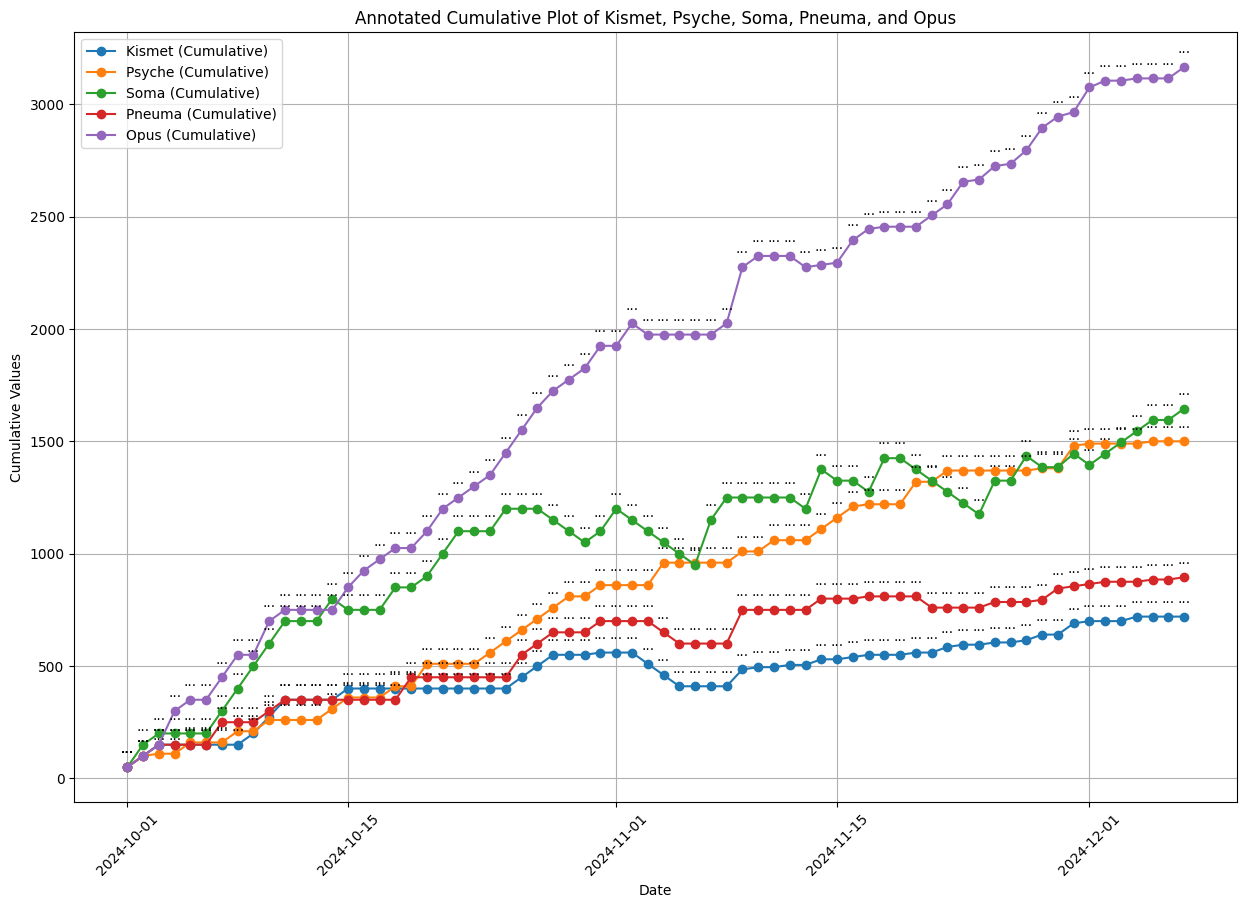

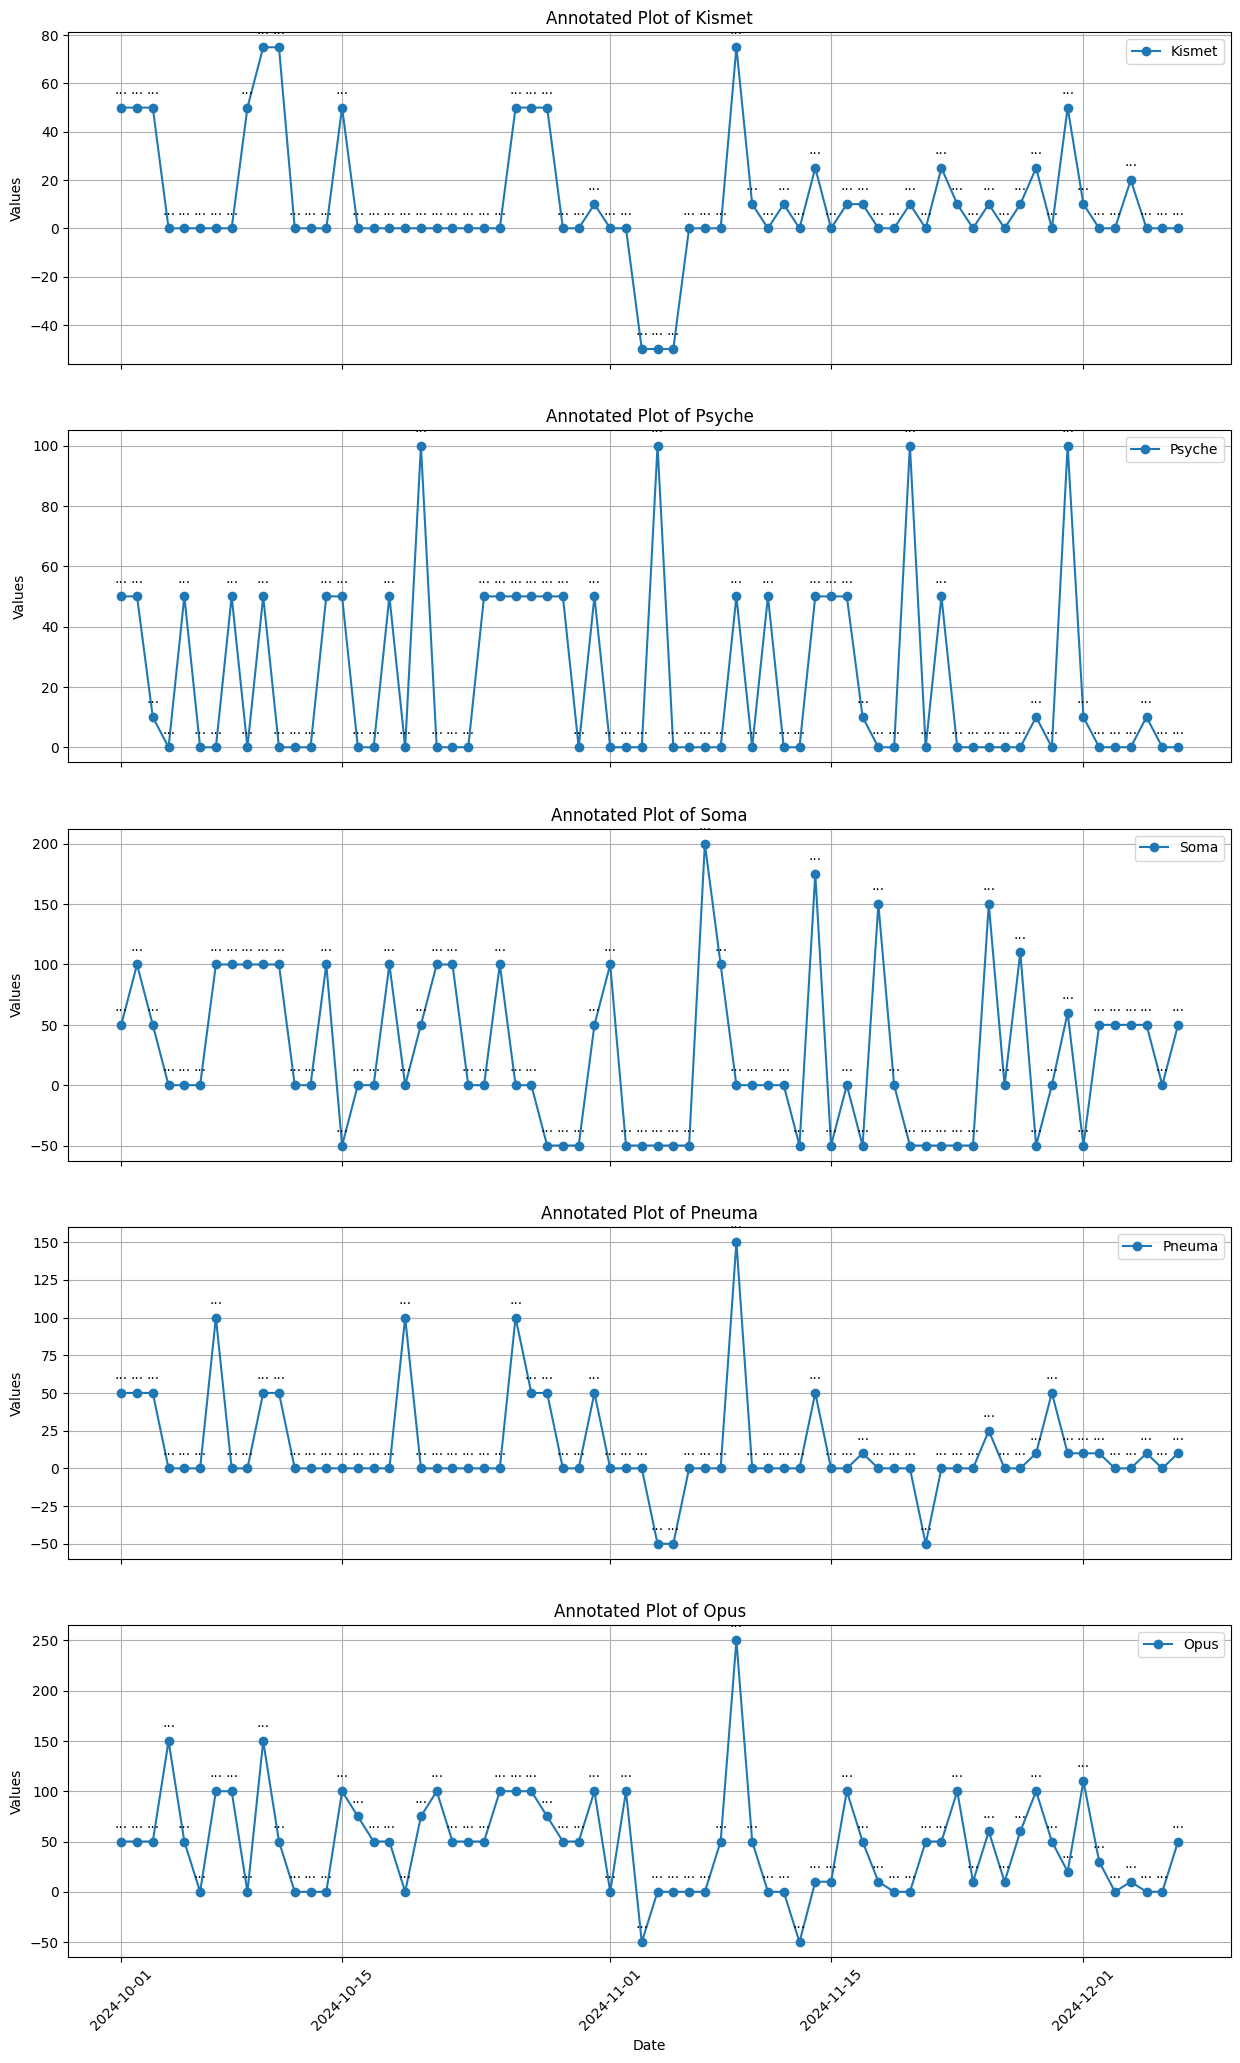

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Cumulative sums
data['Kismet_cum'] = data['Kismet'].cumsum()
data['Psyche_cum'] = data['Psyche'].cumsum()
data['Soma_cum'] = data['Soma'].cumsum()
data['Pneuma_cum'] = data['Pneuma'].cumsum()
data['Opus_cum'] = data['Opus'].cumsum()

# Plotting accumulative plots
fig, ax = plt.subplots(figsize=(15, 10))

# Plot each series cumulative
ax.plot(data['Date'], data['Kismet_cum'], label='Kismet (Cumulative)', marker='o')
ax.plot(data['Date'], data['Psyche_cum'], label='Psyche (Cumulative)', marker='o')
ax.plot(data['Date'], data['Soma_cum'], label='Soma (Cumulative)', marker='o')
ax.plot(data['Date'], data['Pneuma_cum'], label='Pneuma (Cumulative)', marker='o')
ax.plot(data['Date'], data['Opus_cum'], label='Opus (Cumulative)', marker='o')

# Annotate with notes
for i, row in data.iterrows():
    if not np.isnan(row['Kismet_cum']):
        ax.annotate(row['Notes'], (row['Date'], row['Kismet_cum']), textcoords="offset points", xytext=(0, 10), ha='center')
    if not np.isnan(row['Psyche_cum']):
        ax.annotate(row['Notes'], (row['Date'], row['Psyche_cum']), textcoords="offset points", xytext=(0, 10), ha='center')
    if not np.isnan(row['Soma_cum']):
        ax.annotate(row['Notes'], (row['Date'], row['Soma_cum']), textcoords="offset points", xytext=(0, 10), ha='center')
    if not np.isnan(row['Pneuma_cum']):
        ax.annotate(row['Notes'], (row['Date'], row['Pneuma_cum']), textcoords="offset points", xytext=(0, 10), ha='center')
    if not np.isnan(row['Opus_cum']):
        ax.annotate(row['Notes'], (row['Date'], row['Opus_cum']), textcoords="offset points", xytext=(0, 10), ha='center')

# Formatting the plot
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
ax.legend()
plt.xlabel('Date')
plt.ylabel('Cumulative Values')
plt.title('Annotated Cumulative Plot of Kismet, Psyche, Soma, Pneuma, and Opus')
plt.grid(True)

plt.show()

# Plotting separate plots for each domain
fig, axs = plt.subplots(5, 1, figsize=(15, 25), sharex=True)

domains = ['Kismet', 'Psyche', 'Soma', 'Pneuma', 'Opus']

for ax, domain in zip(axs, domains):
    ax.plot(data['Date'], data[domain], label=domain, marker='o')
    for i, row in data.iterrows():
        if not np.isnan(row[domain]):
            ax.annotate(row['Notes'], (row['Date'], row[domain]), textcoords="offset points", xytext=(0, 10), ha='center')
    ax.set_ylabel('Values')
    ax.set_title(f'Annotated Plot of {domain}')
    ax.legend()
    ax.grid(True)

axs[-1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('Date')

plt.show()
